In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WongBasedTraining import WongBasedTrainingCIFAR10
from Architectures import PreActResNet18, WideResNet, WideResNet70_18
import matplotlib.pyplot as plt

In [3]:
import apex

In [4]:
from Boosting import runBoosting

In [5]:
import utils

In [6]:
cuda = torch.device('cuda:0')

In [7]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


# Vanilla Wong Neural Net CIFAR10

## Non Adv

In [8]:
maxSamples = 750001

In [9]:
cifar10_vanilla = WongBasedTrainingCIFAR10(model_base=WideResNet)
cifar10_vanilla.fit(train_loader, test_loader, adv_train=False, epsilon=0, maxSample=maxSamples)

Epoch 	 Seconds 	 LR 	 	 Train Loss 	 Train Acc
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f075792b128>
Progress: 12800,  val accuracy: 0.2700
PGD accuracy: []
Progress: 25600,  val accuracy: 0.3700
PGD accuracy: []
Progress: 38400,  val accuracy: 0.3700
PGD accuracy: []
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f075792b128>
Progress: 62848,  val accuracy: 0.5400
PGD accuracy: []
Progress: 75648,  val accuracy: 0.5800
PGD accuracy: []
Progress: 88448,  val accuracy: 0.5800
PGD accuracy: []


Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=RGB size=32x32 at 0x7F07AF7EC208>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 634, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 596, in __exit__
    if hasattr(self, "fp") and getattr(self, "_exclusive_fp", False):
KeyboardInterrupt


KeyboardInterrupt: 

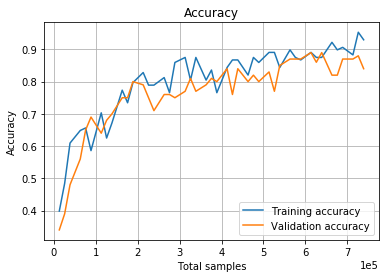

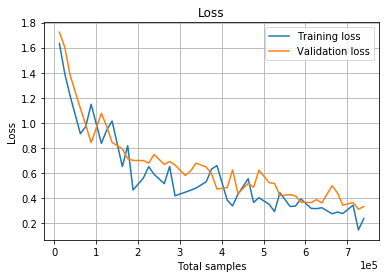

In [17]:
path_head = 'results/plots/cifar10_wl/eps_0/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_vanilla.plot_accuracies(acc_file)
cifar10_vanilla.plot_loss(loss_file)

## Adversarial

In [8]:
from AdversarialAttacks import attack_fgsm, attack_pgd

In [9]:
maxSamples = int(2e6)
# maxSamples = 750001
model_base = WideResNet70_18

In [ ]:
cifar10_adv = WongBasedTrainingCIFAR10(attack_eps=[0.127], train_eps=8, model_base=model_base)
cifar10_adv.fit(train_loader, test_loader, adv_train=True, val_attacks=[attack_pgd], maxSample=maxSamples, attack_iters=20, restarts=1)

Epoch 	 Seconds 	 LR 	 	 Train Loss 	 Train Acc
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f544d464a90>
Progress: 256,  val accuracy: 0.1300
PGD accuracy: [[0.0]]


In [ ]:
cifar10_adv.accuracies

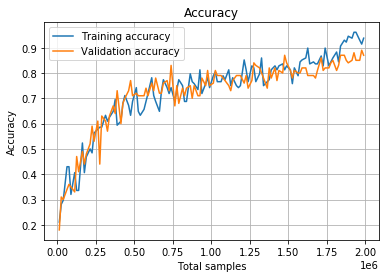

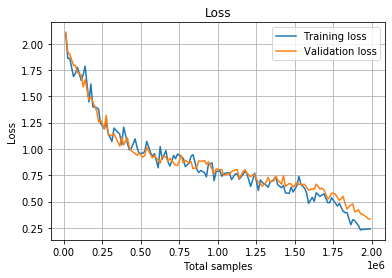

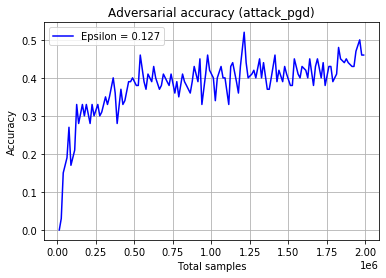

In [11]:
path_head = 'results/plots/cifar10_wl/eps_8/' + model_base.__name__ + '/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_adv.plot_accuracies(acc_file)
cifar10_adv.plot_loss(loss_file)
cifar10_adv.plot_adversarial_accuracies(adv_acc_file)

In [ ]:
print(cifar10_adv.train_checkpoints)